In [460]:
import pandas as pd
import scipy.io as sio
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, multivariate_normal
import math
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [60]:
data = sio.loadmat('data/data.mat')

In [61]:
images = data['data']

In [62]:
testImage1 = images[:,0].reshape(28,28)
testImage2 = images[:,1900].reshape(28,28)

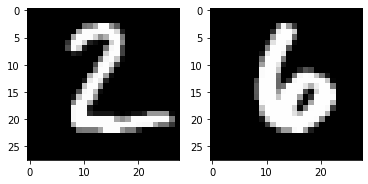

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(testImage1.T,cmap='gray')
ax2.imshow(testImage2.T,cmap='gray')


# EM Algorithm

In [377]:
X = images[:,0].reshape(784,1)
X.shape

(784, 1)

In [378]:
X = images

In [379]:
nrow, ncol = X.shape  
r = 100
piVec = np.ones(2)/2 

In [380]:
cov1 = np.identity(nrow)
cov2 = np.identity(nrow)

In [381]:
muVec1 = np.random.normal(0, 1, nrow)
muVec2 = np.random.normal(0, 1, nrow)

In [382]:
logLikelihood = 0
likelihoodVec = []
hasConverged = False
counter = 0

In [383]:
while ~hasConverged:
    
    eigVal1, eigVec1 = np.linalg.eig(cov1)
    eigVal2, eigVec2 = np.linalg.eig(cov2)
    
    eigVal1 = eigVal1.real
    eigVec1 = eigVec1.real
    eigVal2 = eigVal2.real
    eigVec2 = eigVec2.real
    
    indexSort1 = eigVal1.argsort()[::-1]
    eigVal1 = eigVal1[indexSort1[0:r]]
    eigVec1 = eigVec1[:,indexSort1[0:r]]
    
    indexSort2 = eigVal2.argsort()[::-1]
    eigVal2 = eigVal2[indexSort2[0:r]]
    eigVec2 = eigVec2[:,indexSort2[0:r]]
    
    x1 = eigVec1.T @ X
    mu1 = eigVec1.T @ muVec1
    
    x2 = eigVec2.T @ X
    mu2 = eigVec2.T @ muVec2
    
    
    m1Vec = []
    m2Vec = []
    for i in range(r):
        m1Val = (x1[i]-mu1[i])**2/eigVal1[i]
        m2Val = (x2[i]-mu2[i])**2/eigVal2[i]
        
        m1Vec.append(m1Val)
        m2Vec.append(m2Val)
    
    m1 = np.sum(np.stack(m1Vec),axis=0)
    m2 = np.sum(np.stack(m2Vec),axis=0)
    
    
    D1 = 1
    D2 = 1
    for i in range(r):
        D1 = D1 * eigVal1[i]**(-0.5) 
        D2 = D2 * eigVal2[i]**(-0.5) 
        
    t1 = []
    t2 = []
    
    for i in range(ncol):
        t1.append(piVec[0] * D1 * math.exp(-0.5 * m1[i]))
        t2.append(piVec[1] * D2 * math.exp(-0.5 * m2[i]))
        
    t1 = np.array(t1)
    t2 = np.array(t2)
    
    
    C = []
    for i in range(len(t1)):
        C.append(t1[i]+t2[i])

    t1Normalized = t1/np.array(C)
    t2Normalized = t2/np.array(C)
    
    currLogLikelihood = np.log(np.sum(C))
    
    if abs(currLogLikelihood - logLikelihood) < 1e-4:
        hasConverged = True
    else:
        logLikelihood = currLogLikelihood
        
        piVec[0] = np.sum(t1Normalized)/ncol
        piVec[1] = np.sum(t2Normalized)/ncol
        
        muVec1 = np.sum(t1Normalized*X,axis=1)/np.sum(t1Normalized)
        muVec2 = np.sum(t2Normalized*X,axis=1)/np.sum(t2Normalized)
        
        temp1 = (X-np.tile(muVec1, (ncol, 1)).T)
        cov1 = ((t1Normalized*temp1) @temp1.T)/np.sum(t1Normalized)
        
        temp2 = (X-np.tile(muVec2, (ncol, 1)).T)
        cov2 = ((t2Normalized*temp2) @temp2.T)/np.sum(t2Normalized)
    
        
    
    likelihoodVec.append(currLogLikelihood)
    print(counter, currLogLikelihood)
    counter += 1
    if counter == 50:
        break
    
    

0 -31.37506183543629
1 64.03271352849711
2 68.12307730648128
3 71.94432051220662
4 75.16205413330287
5 76.73014783896129
6 78.54786697560729
7 78.3621844769062
8 78.76926047263585
9 78.52689366559983
10 78.69046763529937
11 78.51877786719335
12 78.62730519005615
13 78.54655411536359
14 78.62999725521853
15 78.57844174151316
16 78.63827037929462
17 78.62892631571643
18 78.63398176439645
19 78.63330465567154
20 78.62461797047662
21 78.6279885032618
22 78.62483761067483
23 78.6278138656837
24 78.6253029735141
25 78.62785402975689
26 78.62556257157931
27 78.6279827188257
28 78.62568591028332
29 78.62806072133176
30 78.62574293521877
31 78.62810616243976
32 78.62576879496108
33 78.62812994367411
34 78.62578044891463
35 78.62814197420435
36 78.62578567010485
37 78.62814785426889
38 78.62578799993719
39 78.62815066755248
40 78.6257890356979
41 78.62815198997892
42 78.62578949471073
43 78.62815260342789
44 78.62578969755808
45 78.62815288496064
46 78.62578978698127
47 78.6281530130618
48 78.62

Text(0, 0.5, 'Log Likelihood')

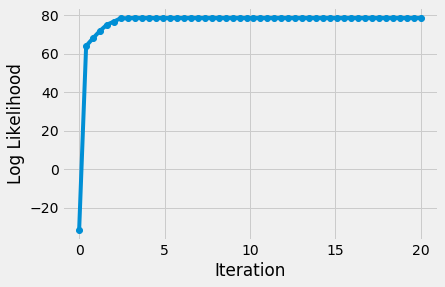

In [384]:
plt.plot(np.linspace(0,20),likelihoodVec,'o-')
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")

# Plotting Images after EM

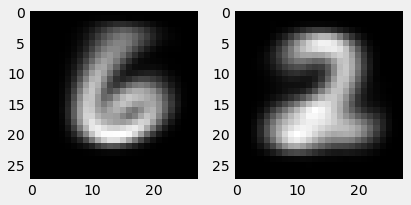

In [385]:

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(muVec1.reshape(28,28).T,cmap='gray')

ax2.imshow(muVec2.reshape(28,28).T,cmap='gray')
ax1.grid(False)
ax2.grid(False)


In [386]:
print("The weight for the images of 6 and 2 are {:.2f} and {:.2f}, respectively ".format(piVec[0],piVec[1]))

The weight for the images of 6 and 2 are 0.48 and 0.52, respectively 


# Q3 d

In [387]:
labelData = sio.loadmat('data/label.mat')

In [404]:
labels = labelData['trueLabel'][0]

In [424]:
predictions = []

for i in range(ncol):
    if t1[i] > t2[i]:
        predictions.append(6)
    else:
        predictions.append(2)

In [425]:
np.sum(abs(labels-predictions))/ncol

0.04020100502512563

In [426]:
GMM_cm = confusion_matrix(labels,predictions)
GMM_cm
miss_class_GMM = (GMM_cm[0][1]+GMM_cm[1][0])/np.sum(GMM_cm)*100

In [427]:
miss_class_GMM

1.0050251256281406

In [430]:
kmeansModel = KMeans(n_clusters=2,random_state=1)

In [432]:
kmeansModel.fit(X.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [433]:
kmeansLabels = kmeansModel.labels_

In [452]:
kmeanPredictions = []

In [453]:
for i in kmeansLabels:
    if i == 0:
        kmeanPredictions.append(2)
    else:
        kmeanPredictions.append(6)

In [454]:
kmeans_cm = confusion_matrix(labels,kmeanPredictions)
miss_class_kmeans = (kmeans_cm[0][1]+kmeans_cm[1][0])/np.sum(kmeans_cm)*100

In [455]:
miss_class_kmeans

6.180904522613066

# Q3 e

In [461]:
pca = PCA(5)

In [462]:
XPCA = pca.fit_transform(X.T).T

In [464]:
X = XPCA

In [466]:
nrow, ncol = X.shape  
r = 5
piVec = np.ones(2)/2 

cov1 = np.identity(nrow)
cov2 = np.identity(nrow)
muVec1 = np.random.normal(0, 1, nrow)
muVec2 = np.random.normal(0, 1, nrow)

logLikelihood = 0
likelihoodVec = []
hasConverged = False
counter = 0

while ~hasConverged:
    
    eigVal1, eigVec1 = np.linalg.eig(cov1)
    eigVal2, eigVec2 = np.linalg.eig(cov2)
    
    eigVal1 = eigVal1.real
    eigVec1 = eigVec1.real
    eigVal2 = eigVal2.real
    eigVec2 = eigVec2.real
    
    indexSort1 = eigVal1.argsort()[::-1]
    eigVal1 = eigVal1[indexSort1[0:r]]
    eigVec1 = eigVec1[:,indexSort1[0:r]]
    
    indexSort2 = eigVal2.argsort()[::-1]
    eigVal2 = eigVal2[indexSort2[0:r]]
    eigVec2 = eigVec2[:,indexSort2[0:r]]
    
    x1 = eigVec1.T @ X
    mu1 = eigVec1.T @ muVec1
    
    x2 = eigVec2.T @ X
    mu2 = eigVec2.T @ muVec2
    
    
    m1Vec = []
    m2Vec = []
    for i in range(r):
        m1Val = (x1[i]-mu1[i])**2/eigVal1[i]
        m2Val = (x2[i]-mu2[i])**2/eigVal2[i]
        
        m1Vec.append(m1Val)
        m2Vec.append(m2Val)
    
    m1 = np.sum(np.stack(m1Vec),axis=0)
    m2 = np.sum(np.stack(m2Vec),axis=0)
    
    
    D1 = 1
    D2 = 1
    for i in range(r):
        D1 = D1 * eigVal1[i]**(-0.5) 
        D2 = D2 * eigVal2[i]**(-0.5) 
        
    t1 = []
    t2 = []
    
    for i in range(ncol):
        t1.append(piVec[0] * D1 * math.exp(-0.5 * m1[i]))
        t2.append(piVec[1] * D2 * math.exp(-0.5 * m2[i]))
        
    t1 = np.array(t1)
    t2 = np.array(t2)
    
    
    C = []
    for i in range(len(t1)):
        C.append(t1[i]+t2[i])

    t1Normalized = t1/np.array(C)
    t2Normalized = t2/np.array(C)
    
    currLogLikelihood = np.log(np.sum(C))
    
    if abs(currLogLikelihood - logLikelihood) < 1e-4:
        hasConverged = True
    else:
        logLikelihood = currLogLikelihood
        
        piVec[0] = np.sum(t1Normalized)/ncol
        piVec[1] = np.sum(t2Normalized)/ncol
        
        muVec1 = np.sum(t1Normalized*X,axis=1)/np.sum(t1Normalized)
        muVec2 = np.sum(t2Normalized*X,axis=1)/np.sum(t2Normalized)
        
        temp1 = (X-np.tile(muVec1, (ncol, 1)).T)
        cov1 = ((t1Normalized*temp1) @temp1.T)/np.sum(t1Normalized)
        
        temp2 = (X-np.tile(muVec2, (ncol, 1)).T)
        cov2 = ((t2Normalized*temp2) @temp2.T)/np.sum(t2Normalized)
    
        
    
    likelihoodVec.append(currLogLikelihood)
    print(counter, currLogLikelihood)
    counter += 1
    if counter == 50:
        break

0 2.825766791020804
1 2.831583887064882
2 3.026301745006151
3 3.1137450470265504
4 3.1626396589403347
5 3.219956028322282
6 3.2841317792887956
7 3.312379550443642
8 3.316973077075728
9 3.3172201768749425
10 3.317210792899805
11 3.317210792899805
12 3.317210792899805
13 3.317210792899805
14 3.317210792899805
15 3.317210792899805
16 3.317210792899805
17 3.317210792899805
18 3.317210792899805
19 3.317210792899805
20 3.317210792899805
21 3.317210792899805
22 3.317210792899805
23 3.317210792899805
24 3.317210792899805
25 3.317210792899805
26 3.317210792899805
27 3.317210792899805
28 3.317210792899805
29 3.317210792899805
30 3.317210792899805
31 3.317210792899805
32 3.317210792899805
33 3.317210792899805
34 3.317210792899805
35 3.317210792899805
36 3.317210792899805
37 3.317210792899805
38 3.317210792899805
39 3.317210792899805
40 3.317210792899805
41 3.317210792899805
42 3.317210792899805
43 3.317210792899805
44 3.317210792899805
45 3.317210792899805
46 3.317210792899805
47 3.31721079289980

Text(0, 0.5, 'Log Likelihood')

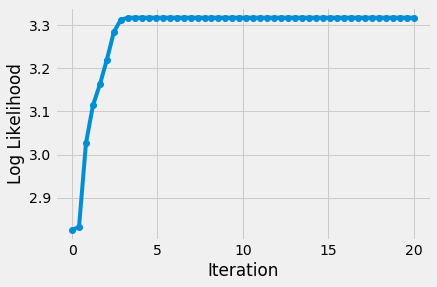

In [467]:
plt.plot(np.linspace(0,20),likelihoodVec,'o-')
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")

In [468]:
predictions = []

for i in range(ncol):
    if t1[i] > t2[i]:
        predictions.append(6)
    else:
        predictions.append(2)

GMM_cm = confusion_matrix(labels,predictions)
GMM_cm
miss_class_GMM = (GMM_cm[0][1]+GMM_cm[1][0])/np.sum(GMM_cm)*100

In [469]:
miss_class_GMM

3.3668341708542715